### Billboard 
https://www.billboard.com/charts/r-b-hip-hop-songs

### Prépartion des fichiers 

In [6]:
import requests
import unittest
from bs4 import BeautifulSoup
import urllib
from lxml import etree
from lxml import html
import requests
import urllib
import re   # regex
import time



def _handle_request_result_and_build_soup(request_result):
    soup=None
    if request_result.status_code == 200:
        html_doc =  request_result.text
        soup = BeautifulSoup(html_doc,"html.parser")
    return soup

def _convert_string(string):
    regex = re.compile(r'[\n\r\t]')
    s = regex.sub(" ", str(string))
    s=s.replace("%","")
    s=s.replace("-","")
    return (s.strip())

def _convert_string_to_float(string):
    regex = re.compile(r'[\n\r\t]')
    s = regex.sub(" ", str(string))
    s=s.replace("%","")
    s=s.replace("-","")
    return float(s.strip())



import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import pickle
import string
from dateutil import parser

def get_soup(start_url):
    response = requests.get(start_url)
    page = response.text
    return BeautifulSoup(page, "lxml")
  

### A function to create list of Billboard Hot 100 urls that catalogue each song going back to 1958
from datetime import date, datetime, timedelta

def perdelta(start, end, delta):
    curr = start
    while curr < end:
        yield curr
        curr += delta

urls = []
for suffix in perdelta(date(2018, 3, 1), date(2018, 11, 30), timedelta(days=7)):
    prefix = 'http://www.billboard.com/charts/hot-100/'
    link = prefix + str(suffix)
    urls.append(link)


listtimes=list(perdelta(date(2018, 3, 1), date(2018, 11, 30), timedelta(days=7)))


In [2]:



def get_toplist(url,max_items):
    res = requests.get(url)    
    soup = _handle_request_result_and_build_soup(res)
    change_class={'class':"chart-list-item"}
    listsongshtml=soup.findAll("div",change_class)


  #week_at_one="chart-number-one__weeks-at-one"
    song_name="chart-number-one__title"
    artist_name="chart-number-one__artist"
    listatt_class=[{'class':artist_name},{'class':song_name}]
    att_rank1=list(map(lambda x:_convert_string(soup.find("div",x).text),listatt_class))


    listartist=[att_rank1[0]]
    listsongs=[att_rank1[1]]
    listrank=["1"]

    for i in range(max_items-2):  #98
        songhtml=listsongshtml[i]

        title=_convert_string(songhtml.find("span",{'class':"chart-list-item__title-text"}).text)
        rank=_convert_string(songhtml.find("div",{'class':"chart-list-item__rank "}).text)
        artist=_convert_string(songhtml.find("div",{'class':"chart-list-item__artist"}).text)
        print("titre  : %s , artist : %s,  rank : %s"%(_convert_string(title),_convert_string( artist),_convert_string(rank)))
        listartist+=[artist]
        listsongs +=[title]
        listrank +=[rank]
    return listartist, listsongs,listrank


In [3]:

########## fonction qui retourne un dataframe des historiques des charts Bill board
def  top_type (music_type,startmonth,finalmonth,year,max_items):
    listtimes=list(perdelta(date(year, startmonth, 1), date(year, finalmonth, 30), timedelta(days=7)))
    urls = []
    for suffix in perdelta(date(year, startmonth, 1), date(year, finalmonth, 30), timedelta(days=7)):
        prefix = "http://www.billboard.com/charts/"+music_type+"/"
        link = prefix + str(suffix)
        urls.append(link)


    listtimes=list(perdelta(date(year, startmonth, 1), date(year, finalmonth, 30), timedelta(days=7)))

    listartists=[]
    listranks=[]
    listitles=[]

    for url in urls:
        print("scrap url : %s"%url)
        res_url=get_toplist(url,max_items)
        listartists+=res_url[0]
        listitles+=res_url[1]
        listranks+=res_url[2]

    dates=[]
    genre=[]
    for time in listtimes:
        dates+=[str(time)]*len(res_url[1])
        genre+=[music_type]*len(res_url[1])


    df = pd.DataFrame({'artist': listartists, 'track': listitles,'type':music_type ,'publish_date': dates,'rank':listranks})
    return df


In [4]:
startmonth=10
finalmonth=11
year=2018
music_type="rock-songs"
max_items=40

pd_rock=top_type(music_type,startmonth,finalmonth,year,max_items)


scrap url : http://www.billboard.com/charts/rock-songs/2018-10-01
titre  : Broken , artist : lovelytheband,  rank : 2
titre  : High Hopes , artist : Panic! At The Disco,  rank : 3
titre  : Thunder , artist : Imagine Dragons,  rank : 4
titre  : Believer , artist : Imagine Dragons,  rank : 5
titre  : Africa , artist : Weezer,  rank : 6
titre  : Guiding Light , artist : Mumford & Sons,  rank : 7
titre  : Zombie , artist : Bad Wolves,  rank : 8
titre  : New Light , artist : John Mayer,  rank : 9
titre  : Zero , artist : Imagine Dragons,  rank : 10
titre  : My Blood , artist : twenty one pilots,  rank : 11
titre  : Shotgun , artist : George Ezra,  rank : 12
titre  : Ghost , artist : Badflower,  rank : 13
titre  : When The Curtain Falls , artist : Greta Van Fleet,  rank : 14
titre  : Jumpsuit , artist : twenty one pilots,  rank : 15
titre  : Are You Ready , artist : Disturbed,  rank : 16
titre  : All My Friends , artist : The Revivalists,  rank : 17
titre  : Gold Rush , artist : Death Cab Fo

titre  : High Hopes , artist : Panic! At The Disco,  rank : 2
titre  : Broken , artist : lovelytheband,  rank : 3
titre  : Thunder , artist : Imagine Dragons,  rank : 4
titre  : Africa , artist : Weezer,  rank : 5
titre  : Bohemian Rhapsody , artist : Queen,  rank : 6
titre  : My Blood , artist : twenty one pilots,  rank : 7
titre  : New Light , artist : John Mayer,  rank : 8
titre  : When The Curtain Falls , artist : Greta Van Fleet,  rank : 9
titre  : We Will Rock You , artist : Queen,  rank : 10
titre  : Another One Bites The Dust , artist : Queen,  rank : 11
titre  : Are You Ready , artist : Disturbed,  rank : 12
titre  : Guiding Light , artist : Mumford & Sons,  rank : 13
titre  : Shotgun , artist : George Ezra,  rank : 14
titre  : Under Pressure , artist : Queen & David Bowie,  rank : 15
titre  : Somebody To Love , artist : Queen,  rank : 16
titre  : Jumpsuit , artist : twenty one pilots,  rank : 17
titre  : Ghost , artist : Badflower,  rank : 18
titre  : You're Somebody Else , a

titre  : Natural , artist : Imagine Dragons,  rank : 2
titre  : Broken , artist : lovelytheband,  rank : 3
titre  : Bohemian Rhapsody , artist : Queen,  rank : 4
titre  : Another One Bites The Dust , artist : Queen,  rank : 5
titre  : Somebody To Love , artist : Queen,  rank : 6
titre  : We Will Rock You , artist : Queen,  rank : 7
titre  : Guiding Light , artist : Mumford & Sons,  rank : 8
titre  : Don't Stop Me Now , artist : Queen,  rank : 9
titre  : Under Pressure , artist : Queen & David Bowie,  rank : 10
titre  : My Blood , artist : twenty one pilots,  rank : 11
titre  : The Greatest Show , artist : Panic! At The Disco,  rank : 12
titre  : Bad Liar , artist : Imagine Dragons,  rank : 13
titre  : We Are The Champions , artist : Queen,  rank : 14
titre  : Killer Queen , artist : Queen,  rank : 15
titre  : Movement , artist : Hozier,  rank : 16
titre  : Africa , artist : Weezer,  rank : 17
titre  : I Want To Break Free , artist : Queen,  rank : 18
titre  : Radio Ga Ga , artist : Que

In [7]:
pd_rock.head()

,artist,track,type,publish_date,rank
0,Imagine Dragons,Natural,rock-songs,2018-10-01,1
1,lovelytheband,Broken,rock-songs,2018-10-01,2
2,Panic! At The Disco,High Hopes,rock-songs,2018-10-01,3
3,Imagine Dragons,Thunder,rock-songs,2018-10-01,4
4,Imagine Dragons,Believer,rock-songs,2018-10-01,5


In [12]:
startmonth=10
finalmonth=11
year=2018
music_type="pop-songs"
max_items=40

pd_pop=top_type(music_type,startmonth,finalmonth,year,max_items)

scrap url : http://www.billboard.com/charts/pop-songs/2018-10-01
titre  : Love Lies , artist : Khalid & Normani,  rank : 2
titre  : Better Now , artist : Post Malone,  rank : 3
titre  : Girls Like You , artist : Maroon 5 Featuring Cardi B,  rank : 4
titre  : Back To You , artist : Selena Gomez,  rank : 5
titre  : God Is A Woman , artist : Ariana Grande,  rank : 6
titre  : No Brainer , artist : DJ Khaled Featuring Justin Bieber, Chance The Rapper & Quavo,  rank : 7
titre  : I Like It , artist : Cardi B, Bad Bunny & J Balvin,  rank : 8
titre  : I'm A Mess , artist : Bebe Rexha,  rank : 9
titre  : Lucid Dreams , artist : Juice WRLD,  rank : 10
titre  : Natural , artist : Imagine Dragons,  rank : 11
titre  : In My Feelings , artist : Drake,  rank : 12
titre  : Lie , artist : NF,  rank : 13
titre  : Happier , artist : Marshmello & Bastille,  rank : 14
titre  : Eastside , artist : Benny Blanco, Halsey & Khalid,  rank : 15
titre  : Jackie Chan , artist : Tiesto & Dzeko Featuring Preme & Post 

titre  : God Is A Woman , artist : Ariana Grande,  rank : 2
titre  : Love Lies , artist : Khalid & Normani,  rank : 3
titre  : Girls Like You , artist : Maroon 5 Featuring Cardi B,  rank : 4
titre  : Better Now , artist : Post Malone,  rank : 5
titre  : Happier , artist : Marshmello & Bastille,  rank : 6
titre  : Lucid Dreams , artist : Juice WRLD,  rank : 7
titre  : Back To You , artist : Selena Gomez,  rank : 8
titre  : Lie , artist : NF,  rank : 9
titre  : I'm A Mess , artist : Bebe Rexha,  rank : 10
titre  : Eastside , artist : Benny Blanco, Halsey & Khalid,  rank : 11
titre  : Breathin , artist : Ariana Grande,  rank : 12
titre  : Natural , artist : Imagine Dragons,  rank : 13
titre  : Beautiful , artist : Bazzi Featuring Camila Cabello,  rank : 14
titre  : High Hopes , artist : Panic! At The Disco,  rank : 15
titre  : Broken , artist : lovelytheband,  rank : 16
titre  : Lost In Japan , artist : Shawn Mendes X Zedd,  rank : 17
titre  : Drew Barrymore , artist : Bryce Vine,  rank :

titre  : High Hopes , artist : Panic! At The Disco,  rank : 2
titre  : Breathin , artist : Ariana Grande,  rank : 3
titre  : Youngblood , artist : 5 Seconds Of Summer,  rank : 4
titre  : Love Lies , artist : Khalid & Normani,  rank : 5
titre  : Girls Like You , artist : Maroon 5 Featuring Cardi B,  rank : 6
titre  : Better Now , artist : Post Malone,  rank : 7
titre  : Lie , artist : NF,  rank : 8
titre  : Eastside , artist : Benny Blanco, Halsey & Khalid,  rank : 9
titre  : Without Me , artist : Halsey,  rank : 10
titre  : God Is A Woman , artist : Ariana Grande,  rank : 11
titre  : Lucid Dreams , artist : Juice WRLD,  rank : 12
titre  : Beautiful , artist : Bazzi Featuring Camila Cabello,  rank : 13
titre  : Broken , artist : lovelytheband,  rank : 14
titre  : Sunflower (SpiderMan: Into The SpiderVerse) , artist : Post Malone & Swae Lee,  rank : 15
titre  : Lost In Japan , artist : Shawn Mendes X Zedd,  rank : 16
titre  : Thank U, Next , artist : Ariana Grande,  rank : 17
titre  : El

In [14]:
pd_pop.head(15)

,artist,track,type,publish_date,rank
0,5 Seconds Of Summer,Youngblood,pop-songs,2018-10-01,1
1,Khalid & Normani,Love Lies,pop-songs,2018-10-01,2
2,Post Malone,Better Now,pop-songs,2018-10-01,3
3,Maroon 5 Featuring Cardi B,Girls Like You,pop-songs,2018-10-01,4
4,Selena Gomez,Back To You,pop-songs,2018-10-01,5
5,Ariana Grande,God Is A Woman,pop-songs,2018-10-01,6
6,"DJ Khaled Featuring Justin Bieber, Chance The ...",No Brainer,pop-songs,2018-10-01,7
7,"Cardi B, Bad Bunny & J Balvin",I Like It,pop-songs,2018-10-01,8
8,Bebe Rexha,I'm A Mess,pop-songs,2018-10-01,9
9,Juice WRLD,Lucid Dreams,pop-songs,2018-10-01,10


In [30]:
startmonth=3
finalmonth=11
year=2018
music_type="r-b-hip-hop-songs"
max_items=50

pd_r_hiphop=top_type(music_type,startmonth,finalmonth,year,max_items)


scrap url : http://www.billboard.com/charts/r-b-hip-hop-songs/2018-03-01
titre  : Finesse , artist : Bruno Mars & Cardi B,  rank : 2
titre  : Look Alive , artist : BlocBoy JB Featuring Drake,  rank : 3
titre  : Rockstar , artist : Post Malone Featuring 21 Savage,  rank : 4
titre  : All The Stars , artist : Kendrick Lamar & SZA,  rank : 5
titre  : Pray For Me , artist : The Weeknd & Kendrick Lamar,  rank : 6
titre  : Stir Fry , artist : Migos,  rank : 7
titre  : Let You Down , artist : NF,  rank : 8
titre  : Him & I , artist : GEazy & Halsey,  rank : 9
titre  : Love. , artist : Kendrick Lamar Featuring Zacari,  rank : 10
titre  : I Fall Apart , artist : Post Malone,  rank : 11
titre  : MotorSport , artist : Migos, Nicki Minaj & Cardi B,  rank : 12
titre  : King's Dead , artist : Jay Rock, Kendrick Lamar, Future & James Blake,  rank : 13
titre  : Gummo , artist : 6ix9ine,  rank : 14
titre  : Bartier Cardi , artist : Cardi B Featuring 21 Savage,  rank : 15
titre  : No Limit , artist : GEa

titre  : Finesse , artist : Bruno Mars & Cardi B,  rank : 2
titre  : Psycho , artist : Post Malone Featuring Ty Dolla $ign,  rank : 3
titre  : Pray For Me , artist : The Weeknd & Kendrick Lamar,  rank : 4
titre  : Look Alive , artist : BlocBoy JB Featuring Drake,  rank : 5
titre  : All The Stars , artist : Kendrick Lamar & SZA,  rank : 6
titre  : Stir Fry , artist : Migos,  rank : 7
titre  : Rockstar , artist : Post Malone Featuring 21 Savage,  rank : 8
titre  : Let You Down , artist : NF,  rank : 9
titre  : Ric Flair Drip , artist : Offset & Metro Boomin,  rank : 10
titre  : Him & I , artist : GEazy & Halsey,  rank : 11
titre  : Sad! , artist : XXXTENTACION,  rank : 12
titre  : King's Dead , artist : Jay Rock, Kendrick Lamar, Future & James Blake,  rank : 13
titre  : I Fall Apart , artist : Post Malone,  rank : 14
titre  : Plug Walk , artist : Rich The Kid,  rank : 15
titre  : Everyday , artist : Logic & Marshmello,  rank : 16
titre  : Bartier Cardi , artist : Cardi B Featuring 21 Sav

titre  : Psycho , artist : Post Malone Featuring Ty Dolla $ign,  rank : 2
titre  : Call Out My Name , artist : The Weeknd,  rank : 3
titre  : Look Alive , artist : BlocBoy JB Featuring Drake,  rank : 4
titre  : Finesse , artist : Bruno Mars & Cardi B,  rank : 5
titre  : Freaky Friday , artist : Lil Dicky Featuring Chris Brown,  rank : 6
titre  : Walk It Talk It , artist : Migos Featuring Drake,  rank : 7
titre  : Plug Walk , artist : Rich The Kid,  rank : 8
titre  : Pray For Me , artist : The Weeknd & Kendrick Lamar,  rank : 9
titre  : Be Careful , artist : Cardi B,  rank : 10
titre  : Stir Fry , artist : Migos,  rank : 11
titre  : Sad! , artist : XXXTENTACION,  rank : 12
titre  : All The Stars , artist : Kendrick Lamar & SZA,  rank : 13
titre  : Ric Flair Drip , artist : Offset & Metro Boomin,  rank : 14
titre  : Let You Down , artist : NF,  rank : 15
titre  : Try Me , artist : The Weeknd,  rank : 16
titre  : Wasted Times , artist : The Weeknd,  rank : 17
titre  : Him & I , artist : G

titre  : God's Plan , artist : Drake,  rank : 2
titre  : Psycho , artist : Post Malone Featuring Ty Dolla $ign,  rank : 3
titre  : ATM , artist : J. Cole,  rank : 4
titre  : Kevin's Heart , artist : J. Cole,  rank : 5
titre  : Look Alive , artist : BlocBoy JB Featuring Drake,  rank : 6
titre  : KOD , artist : J. Cole,  rank : 7
titre  : Freaky Friday , artist : Lil Dicky Featuring Chris Brown,  rank : 8
titre  : Photograph , artist : J. Cole,  rank : 9
titre  : Motiv8 , artist : J. Cole,  rank : 10
titre  : I Like It , artist : Cardi B, Bad Bunny & J Balvin,  rank : 11
titre  : Walk It Talk It , artist : Migos Featuring Drake,  rank : 12
titre  : Call Out My Name , artist : The Weeknd,  rank : 13
titre  : 1985 (Intro To The Fall Off) , artist : J. Cole,  rank : 14
titre  : Plug Walk , artist : Rich The Kid,  rank : 15
titre  : Be Careful , artist : Cardi B,  rank : 16
titre  : Finesse , artist : Bruno Mars & Cardi B,  rank : 17
titre  : Pray For Me , artist : The Weeknd & Kendrick Lama

titre  : Nice For What , artist : Drake,  rank : 2
titre  : God's Plan , artist : Drake,  rank : 3
titre  : Psycho , artist : Post Malone Featuring Ty Dolla $ign,  rank : 4
titre  : Look Alive , artist : BlocBoy JB Featuring Drake,  rank : 5
titre  : Boo'd Up , artist : Ella Mai,  rank : 6
titre  : Walk It Talk It , artist : Migos Featuring Drake,  rank : 7
titre  : Freaky Friday , artist : Lil Dicky Featuring Chris Brown,  rank : 8
titre  : Pray For Me , artist : The Weeknd & Kendrick Lamar,  rank : 9
titre  : Rockstar , artist : Post Malone Featuring 21 Savage,  rank : 10
titre  : I Like It , artist : Cardi B, Bad Bunny & J Balvin,  rank : 11
titre  : Plug Walk , artist : Rich The Kid,  rank : 12
titre  : Be Careful , artist : Cardi B,  rank : 13
titre  : Better Now , artist : Post Malone,  rank : 14
titre  : Sad! , artist : XXXTENTACION,  rank : 15
titre  : ChunLi , artist : Nicki Minaj,  rank : 16
titre  : Finesse , artist : Bruno Mars & Cardi B,  rank : 17
titre  : Powerglide , ar

titre  : Nice For What , artist : Drake,  rank : 2
titre  : I Like It , artist : Cardi B, Bad Bunny & J Balvin,  rank : 3
titre  : God's Plan , artist : Drake,  rank : 4
titre  : Boo'd Up , artist : Ella Mai,  rank : 5
titre  : This Is America , artist : Childish Gambino,  rank : 6
titre  : Yikes , artist : Kanye West,  rank : 7
titre  : Lucid Dreams , artist : Juice WRLD,  rank : 8
titre  : All Mine , artist : Kanye West,  rank : 9
titre  : Yes Indeed , artist : Lil Baby & Drake,  rank : 10
titre  : Ghost Town , artist : Kanye West Featuring PARTYNEXTDOOR,  rank : 11
titre  : Walk It Talk It , artist : Migos Featuring Drake,  rank : 12
titre  : Look Alive , artist : BlocBoy JB Featuring Drake,  rank : 13
titre  : Wouldn't Leave , artist : Kanye West Featuring PARTYNEXTDOOR,  rank : 14
titre  : Be Careful , artist : Cardi B,  rank : 15
titre  : Violent Crimes , artist : Kanye West,  rank : 16
titre  : I Thought About Killing You , artist : Kanye West,  rank : 17
titre  : I'm Upset , ar

titre  : Sad! , artist : XXXTENTACION,  rank : 2
titre  : Lucid Dreams , artist : Juice WRLD,  rank : 3
titre  : Psycho , artist : Post Malone Featuring Ty Dolla $ign,  rank : 4
titre  : Nice For What , artist : Drake,  rank : 5
titre  : Boo'd Up , artist : Ella Mai,  rank : 6
titre  : God's Plan , artist : Drake,  rank : 7
titre  : Yes Indeed , artist : Lil Baby & Drake,  rank : 8
titre  : Moonlight , artist : XXXTENTACION,  rank : 9
titre  : Better Now , artist : Post Malone,  rank : 10
titre  : Plug Walk , artist : Rich The Kid,  rank : 11
titre  : Changes , artist : XXXTENTACION,  rank : 12
titre  : Apes**t , artist : The Carters,  rank : 13
titre  : This Is America , artist : Childish Gambino,  rank : 14
titre  : Jocelyn Flores , artist : XXXTENTACION,  rank : 15
titre  : I'm Upset , artist : Drake,  rank : 16
titre  : Look Alive , artist : BlocBoy JB Featuring Drake,  rank : 17
titre  : Walk It Talk It , artist : Migos Featuring Drake,  rank : 18
titre  : Taste , artist : Tyga Fe

titre  : I Like It , artist : Cardi B, Bad Bunny & J Balvin,  rank : 2
titre  : Nice For What , artist : Drake,  rank : 3
titre  : Boo'd Up , artist : Ella Mai,  rank : 4
titre  : Lucid Dreams , artist : Juice WRLD,  rank : 5
titre  : Better Now , artist : Post Malone,  rank : 6
titre  : Psycho , artist : Post Malone Featuring Ty Dolla $ign,  rank : 7
titre  : God's Plan , artist : Drake,  rank : 8
titre  : Taste , artist : Tyga Featuring Offset,  rank : 9
titre  : Sad! , artist : XXXTENTACION,  rank : 10
titre  : Yes Indeed , artist : Lil Baby & Drake,  rank : 11
titre  : Nonstop , artist : Drake,  rank : 12
titre  : I'm Upset , artist : Drake,  rank : 13
titre  : Apes**t , artist : The Carters,  rank : 14
titre  : Don't Matter To Me , artist : Drake Featuring Michael Jackson,  rank : 15
titre  : Moonlight , artist : XXXTENTACION,  rank : 16
titre  : Big Bank , artist : YG Featuring 2 Chainz, Big Sean & Nicki Minaj,  rank : 17
titre  : This Is America , artist : Childish Gambino,  ran

titre  : I Like It , artist : Cardi B, Bad Bunny & J Balvin,  rank : 2
titre  : Sicko Mode , artist : Travis Scott,  rank : 3
titre  : FEFE , artist : 6ix9ine Featuring Nicki Minaj & Murda Beatz,  rank : 4
titre  : Better Now , artist : Post Malone,  rank : 5
titre  : Lucid Dreams , artist : Juice WRLD,  rank : 6
titre  : Stargazing , artist : Travis Scott,  rank : 7
titre  : Taste , artist : Tyga Featuring Offset,  rank : 8
titre  : Boo'd Up , artist : Ella Mai,  rank : 9
titre  : No Brainer , artist : DJ Khaled Featuring Justin Bieber, Chance The Rapper & Quavo,  rank : 10
titre  : Nice For What , artist : Drake,  rank : 11
titre  : Psycho , artist : Post Malone Featuring Ty Dolla $ign,  rank : 12
titre  : Big Bank , artist : YG Featuring 2 Chainz, Big Sean & Nicki Minaj,  rank : 13
titre  : Yes Indeed , artist : Lil Baby & Drake,  rank : 14
titre  : Carousel , artist : Travis Scott,  rank : 15
titre  : Yosemite , artist : Travis Scott,  rank : 16
titre  : R.I.P Screw , artist : Trav

titre  : I Like It , artist : Cardi B, Bad Bunny & J Balvin,  rank : 2
titre  : Better Now , artist : Post Malone,  rank : 3
titre  : FEFE , artist : 6ix9ine Featuring Nicki Minaj & Murda Beatz,  rank : 4
titre  : Lucid Dreams , artist : Juice WRLD,  rank : 5
titre  : Sicko Mode , artist : Travis Scott,  rank : 6
titre  : Taste , artist : Tyga Featuring Offset,  rank : 7
titre  : No Brainer , artist : DJ Khaled Featuring Justin Bieber, Chance The Rapper & Quavo,  rank : 8
titre  : Boo'd Up , artist : Ella Mai,  rank : 9
titre  : Yes Indeed , artist : Lil Baby & Drake,  rank : 10
titre  : Nonstop , artist : Drake,  rank : 11
titre  : Big Bank , artist : YG Featuring 2 Chainz, Big Sean & Nicki Minaj,  rank : 12
titre  : Nice For What , artist : Drake,  rank : 13
titre  : Sad! , artist : XXXTENTACION,  rank : 14
titre  : Stargazing , artist : Travis Scott,  rank : 15
titre  : Barbie Dreams , artist : Nicki Minaj,  rank : 16
titre  : Moonlight , artist : XXXTENTACION,  rank : 17
titre  : W

titre  : Killshot , artist : Eminem,  rank : 2
titre  : Lucid Dreams , artist : Juice WRLD,  rank : 3
titre  : Better Now , artist : Post Malone,  rank : 4
titre  : I Like It , artist : Cardi B, Bad Bunny & J Balvin,  rank : 5
titre  : I Love It , artist : Kanye West & Lil Pump,  rank : 6
titre  : FEFE , artist : 6ix9ine Featuring Nicki Minaj & Murda Beatz,  rank : 7
titre  : Sicko Mode , artist : Travis Scott,  rank : 8
titre  : Taste , artist : Tyga Featuring Offset,  rank : 9
titre  : Lucky You , artist : Eminem Featuring Joyner Lucas,  rank : 10
titre  : Nonstop , artist : Drake,  rank : 11
titre  : No Brainer , artist : DJ Khaled Featuring Justin Bieber, Chance The Rapper & Quavo,  rank : 12
titre  : Yes Indeed , artist : Lil Baby & Drake,  rank : 13
titre  : Boo'd Up , artist : Ella Mai,  rank : 14
titre  : Trip , artist : Ella Mai,  rank : 15
titre  : Rap Devil , artist : Machine Gun Kelly,  rank : 16
titre  : Big Bank , artist : YG Featuring 2 Chainz, Big Sean & Nicki Minaj,  r

titre  : Better Now , artist : Post Malone,  rank : 2
titre  : Drip Too Hard , artist : Lil Baby & Gunna,  rank : 3
titre  : Sicko Mode , artist : Travis Scott,  rank : 4
titre  : I Like It , artist : Cardi B, Bad Bunny & J Balvin,  rank : 5
titre  : FEFE , artist : 6ix9ine Featuring Nicki Minaj & Murda Beatz,  rank : 6
titre  : In My Feelings , artist : Drake,  rank : 7
titre  : Taste , artist : Tyga Featuring Offset,  rank : 8
titre  : Never Recover , artist : Lil Baby & Gunna Featuring Drake,  rank : 9
titre  : Trip , artist : Ella Mai,  rank : 10
titre  : I Love It , artist : Kanye West & Lil Pump,  rank : 11
titre  : Nonstop , artist : Drake,  rank : 12
titre  : Mona Lisa , artist : Lil Wayne Featuring Kendrick Lamar,  rank : 13
titre  : Mo Bamba , artist : Sheck Wes,  rank : 14
titre  : Stoopid , artist : 6ix9ine Featuring Bobby Shmurda,  rank : 15
titre  : Yes Indeed , artist : Lil Baby & Drake,  rank : 16
titre  : Big Bank , artist : YG Featuring 2 Chainz, Big Sean & Nicki Mina

titre  : Lucid Dreams , artist : Juice WRLD,  rank : 2
titre  : Better Now , artist : Post Malone,  rank : 3
titre  : ZEZE , artist : Kodak Black Featuring Travis Scott & Offset,  rank : 4
titre  : Drip Too Hard , artist : Lil Baby & Gunna,  rank : 5
titre  : Mo Bamba , artist : Sheck Wes,  rank : 6
titre  : Money , artist : Cardi B,  rank : 7
titre  : Trip , artist : Ella Mai,  rank : 8
titre  : I Like It , artist : Cardi B, Bad Bunny & J Balvin,  rank : 9
titre  : Taste , artist : Tyga Featuring Offset,  rank : 10
titre  : In My Feelings , artist : Drake,  rank : 11
titre  : Sunflower (SpiderMan: Into The SpiderVerse) , artist : Post Malone & Swae Lee,  rank : 12
titre  : Nonstop , artist : Drake,  rank : 13
titre  : Wake Up In The Sky , artist : Gucci Mane X Bruno Mars X Kodak Black,  rank : 14
titre  : FEFE , artist : 6ix9ine Featuring Nicki Minaj & Murda Beatz,  rank : 15
titre  : Arms Around You , artist : XXXTENTACION x Lil Pump Featuring Maluma & Swae Lee,  rank : 16
titre  : Y

titre  : Lucid Dreams , artist : Juice WRLD,  rank : 2
titre  : Mo Bamba , artist : Sheck Wes,  rank : 3
titre  : Drip Too Hard , artist : Lil Baby & Gunna,  rank : 4
titre  : ZEZE , artist : Kodak Black Featuring Travis Scott & Offset,  rank : 5
titre  : Better Now , artist : Post Malone,  rank : 6
titre  : Wake Up In The Sky , artist : Gucci Mane X Bruno Mars X Kodak Black,  rank : 7
titre  : Trip , artist : Ella Mai,  rank : 8
titre  : Sunflower (SpiderMan: Into The SpiderVerse) , artist : Post Malone & Swae Lee,  rank : 9
titre  : Money , artist : Cardi B,  rank : 10
titre  : In My Feelings , artist : Drake,  rank : 11
titre  : Taste , artist : Tyga Featuring Offset,  rank : 12
titre  : Leave Me Alone , artist : Flipp Dinero,  rank : 13
titre  : Nonstop , artist : Drake,  rank : 14
titre  : Uproar , artist : Lil Wayne,  rank : 15
titre  : FEFE , artist : 6ix9ine Featuring Nicki Minaj & Murda Beatz,  rank : 16
titre  : BAD! , artist : XXXTENTACION,  rank : 17
titre  : Ring , artist 

In [31]:
pd_r_hiphop.head()

,artist,track,type,publish_date,rank
0,Drake,God's Plan,r-b-hip-hop-songs,2018-03-01,1
1,Bruno Mars & Cardi B,Finesse,r-b-hip-hop-songs,2018-03-01,2
2,BlocBoy JB Featuring Drake,Look Alive,r-b-hip-hop-songs,2018-03-01,3
3,Post Malone Featuring 21 Savage,Rockstar,r-b-hip-hop-songs,2018-03-01,4
4,Kendrick Lamar & SZA,All The Stars,r-b-hip-hop-songs,2018-03-01,5


In [32]:

startmonth=3
finalmonth=11
year=2018
music_type="hot-100"
max_items=100

pd_hot=top_type(music_type,startmonth,finalmonth,year,max_items)


scrap url : http://www.billboard.com/charts/hot-100/2018-03-01
titre  : Perfect , artist : Ed Sheeran,  rank : 2
titre  : Finesse , artist : Bruno Mars & Cardi B,  rank : 3
titre  : Havana , artist : Camila Cabello Featuring Young Thug,  rank : 4
titre  : Look Alive , artist : BlocBoy JB Featuring Drake,  rank : 5
titre  : Rockstar , artist : Post Malone Featuring 21 Savage,  rank : 6
titre  : All The Stars , artist : Kendrick Lamar & SZA,  rank : 7
titre  : Meant To Be , artist : Bebe Rexha & Florida Georgia Line,  rank : 8
titre  : Pray For Me , artist : The Weeknd & Kendrick Lamar,  rank : 9
titre  : Stir Fry , artist : Migos,  rank : 10
titre  : New Rules , artist : Dua Lipa,  rank : 11
titre  : Let You Down , artist : NF,  rank : 12
titre  : The Middle , artist : Zedd, Maren Morris & Grey,  rank : 13
titre  : Him & I , artist : GEazy & Halsey,  rank : 14
titre  : Love. , artist : Kendrick Lamar Featuring Zacari,  rank : 15
titre  : Thunder , artist : Imagine Dragons,  rank : 16
ti

titre  : Perfect , artist : Ed Sheeran,  rank : 2
titre  : Finesse , artist : Bruno Mars & Cardi B,  rank : 3
titre  : Psycho , artist : Post Malone Featuring Ty Dolla $ign,  rank : 4
titre  : Meant To Be , artist : Bebe Rexha & Florida Georgia Line,  rank : 5
titre  : Havana , artist : Camila Cabello Featuring Young Thug,  rank : 6
titre  : Look Alive , artist : BlocBoy JB Featuring Drake,  rank : 7
titre  : The Middle , artist : Zedd, Maren Morris & Grey,  rank : 8
titre  : Pray For Me , artist : The Weeknd & Kendrick Lamar,  rank : 9
titre  : Stir Fry , artist : Migos,  rank : 10
titre  : All The Stars , artist : Kendrick Lamar & SZA,  rank : 11
titre  : Rockstar , artist : Post Malone Featuring 21 Savage,  rank : 12
titre  : Let You Down , artist : NF,  rank : 13
titre  : New Rules , artist : Dua Lipa,  rank : 14
titre  : Him & I , artist : GEazy & Halsey,  rank : 15
titre  : Ric Flair Drip , artist : Offset & Metro Boomin,  rank : 16
titre  : Sad! , artist : XXXTENTACION,  rank : 

titre  : Meant To Be , artist : Bebe Rexha & Florida Georgia Line,  rank : 2
titre  : Perfect , artist : Ed Sheeran,  rank : 3
titre  : Finesse , artist : Bruno Mars & Cardi B,  rank : 4
titre  : Psycho , artist : Post Malone Featuring Ty Dolla $ign,  rank : 5
titre  : The Middle , artist : Zedd, Maren Morris & Grey,  rank : 6
titre  : Sad! , artist : XXXTENTACION,  rank : 7
titre  : Havana , artist : Camila Cabello Featuring Young Thug,  rank : 8
titre  : Freaky Friday , artist : Lil Dicky Featuring Chris Brown,  rank : 9
titre  : Pray For Me , artist : The Weeknd & Kendrick Lamar,  rank : 10
titre  : Look Alive , artist : BlocBoy JB Featuring Drake,  rank : 11
titre  : Stir Fry , artist : Migos,  rank : 12
titre  : Ric Flair Drip , artist : Offset & Metro Boomin,  rank : 13
titre  : All The Stars , artist : Kendrick Lamar & SZA,  rank : 14
titre  : Mine , artist : Bazzi,  rank : 15
titre  : New Rules , artist : Dua Lipa,  rank : 16
titre  : Let You Down , artist : NF,  rank : 17
titr

titre  : Meant To Be , artist : Bebe Rexha & Florida Georgia Line,  rank : 2
titre  : Psycho , artist : Post Malone Featuring Ty Dolla $ign,  rank : 3
titre  : Call Out My Name , artist : The Weeknd,  rank : 4
titre  : Look Alive , artist : BlocBoy JB Featuring Drake,  rank : 5
titre  : The Middle , artist : Zedd, Maren Morris & Grey,  rank : 6
titre  : Perfect , artist : Ed Sheeran,  rank : 7
titre  : Finesse , artist : Bruno Mars & Cardi B,  rank : 8
titre  : Freaky Friday , artist : Lil Dicky Featuring Chris Brown,  rank : 9
titre  : Walk It Talk It , artist : Migos Featuring Drake,  rank : 10
titre  : Havana , artist : Camila Cabello Featuring Young Thug,  rank : 11
titre  : Mine , artist : Bazzi,  rank : 12
titre  : Plug Walk , artist : Rich The Kid,  rank : 13
titre  : Never Be The Same , artist : Camila Cabello,  rank : 14
titre  : Pray For Me , artist : The Weeknd & Kendrick Lamar,  rank : 15
titre  : Be Careful , artist : Cardi B,  rank : 16
titre  : Stir Fry , artist : Migos,

titre  : God's Plan , artist : Drake,  rank : 2
titre  : Meant To Be , artist : Bebe Rexha & Florida Georgia Line,  rank : 3
titre  : Psycho , artist : Post Malone Featuring Ty Dolla $ign,  rank : 4
titre  : The Middle , artist : Zedd, Maren Morris & Grey,  rank : 5
titre  : Look Alive , artist : BlocBoy JB Featuring Drake,  rank : 6
titre  : Perfect , artist : Ed Sheeran,  rank : 7
titre  : Freaky Friday , artist : Lil Dicky Featuring Chris Brown,  rank : 8
titre  : I Like It , artist : Cardi B, Bad Bunny & J Balvin,  rank : 9
titre  : ChunLi , artist : Nicki Minaj,  rank : 10
titre  : Walk It Talk It , artist : Migos Featuring Drake,  rank : 11
titre  : Finesse , artist : Bruno Mars & Cardi B,  rank : 12
titre  : Never Be The Same , artist : Camila Cabello,  rank : 13
titre  : Mine , artist : Bazzi,  rank : 14
titre  : Be Careful , artist : Cardi B,  rank : 15
titre  : Plug Walk , artist : Rich The Kid,  rank : 16
titre  : Call Out My Name , artist : The Weeknd,  rank : 17
titre  : P

titre  : Psycho , artist : Post Malone Featuring Ty Dolla $ign,  rank : 2
titre  : God's Plan , artist : Drake,  rank : 3
titre  : Meant To Be , artist : Bebe Rexha & Florida Georgia Line,  rank : 4
titre  : The Middle , artist : Zedd, Maren Morris & Grey,  rank : 5
titre  : Never Be The Same , artist : Camila Cabello,  rank : 6
titre  : Better Now , artist : Post Malone,  rank : 7
titre  : Rockstar , artist : Post Malone Featuring 21 Savage,  rank : 8
titre  : Look Alive , artist : BlocBoy JB Featuring Drake,  rank : 9
titre  : No Tears Left To Cry , artist : Ariana Grande,  rank : 10
titre  : Paranoid , artist : Post Malone,  rank : 11
titre  : Perfect , artist : Ed Sheeran,  rank : 12
titre  : Freaky Friday , artist : Lil Dicky Featuring Chris Brown,  rank : 13
titre  : Rich & Sad , artist : Post Malone,  rank : 14
titre  : Spoil My Night , artist : Post Malone Featuring Swae Lee,  rank : 15
titre  : Ball For Me , artist : Post Malone Featuring Nicki Minaj,  rank : 16
titre  : Stay 

titre  : Nice For What , artist : Drake,  rank : 2
titre  : God's Plan , artist : Drake,  rank : 3
titre  : Psycho , artist : Post Malone Featuring Ty Dolla $ign,  rank : 4
titre  : Meant To Be , artist : Bebe Rexha & Florida Georgia Line,  rank : 5
titre  : The Middle , artist : Zedd, Maren Morris & Grey,  rank : 6
titre  : No Tears Left To Cry , artist : Ariana Grande,  rank : 7
titre  : Look Alive , artist : BlocBoy JB Featuring Drake,  rank : 8
titre  : Never Be The Same , artist : Camila Cabello,  rank : 9
titre  : Perfect , artist : Ed Sheeran,  rank : 10
titre  : Boo'd Up , artist : Ella Mai,  rank : 11
titre  : Walk It Talk It , artist : Migos Featuring Drake,  rank : 12
titre  : Freaky Friday , artist : Lil Dicky Featuring Chris Brown,  rank : 13
titre  : Whatever It Takes , artist : Imagine Dragons,  rank : 14
titre  : Heaven , artist : Kane Brown,  rank : 15
titre  : Friends , artist : Marshmello & AnneMarie,  rank : 16
titre  : Mine , artist : Bazzi,  rank : 17
titre  : Pra

titre  : Psycho , artist : Post Malone Featuring Ty Dolla $ign,  rank : 2
titre  : God's Plan , artist : Drake,  rank : 3
titre  : This Is America , artist : Childish Gambino,  rank : 4
titre  : The Middle , artist : Zedd, Maren Morris & Grey,  rank : 5
titre  : Yes Indeed , artist : Lil Baby & Drake,  rank : 6
titre  : I Like It , artist : Cardi B, Bad Bunny & J Balvin,  rank : 7
titre  : Boo'd Up , artist : Ella Mai,  rank : 8
titre  : Meant To Be , artist : Bebe Rexha & Florida Georgia Line,  rank : 9
titre  : No Tears Left To Cry , artist : Ariana Grande,  rank : 10
titre  : In My Blood , artist : Shawn Mendes,  rank : 11
titre  : Look Alive , artist : BlocBoy JB Featuring Drake,  rank : 12
titre  : Friends , artist : Marshmello & AnneMarie,  rank : 13
titre  : Walk It Talk It , artist : Migos Featuring Drake,  rank : 14
titre  : Lucid Dreams , artist : Juice WRLD,  rank : 15
titre  : Never Be The Same , artist : Camila Cabello,  rank : 16
titre  : Perfect , artist : Ed Sheeran,  r

titre  : Psycho , artist : Post Malone Featuring Ty Dolla $ign,  rank : 2
titre  : I Like It , artist : Cardi B, Bad Bunny & J Balvin,  rank : 3
titre  : God's Plan , artist : Drake,  rank : 4
titre  : Girls Like You , artist : Maroon 5 Featuring Cardi B,  rank : 5
titre  : Lucid Dreams , artist : Juice WRLD,  rank : 6
titre  : Boo'd Up , artist : Ella Mai,  rank : 7
titre  : The Middle , artist : Zedd, Maren Morris & Grey,  rank : 8
titre  : No Tears Left To Cry , artist : Ariana Grande,  rank : 9
titre  : Meant To Be , artist : Bebe Rexha & Florida Georgia Line,  rank : 10
titre  : Yes Indeed , artist : Lil Baby & Drake,  rank : 11
titre  : This Is America , artist : Childish Gambino,  rank : 12
titre  : Friends , artist : Marshmello & AnneMarie,  rank : 13
titre  : Walk It Talk It , artist : Migos Featuring Drake,  rank : 14
titre  : Mine , artist : Bazzi,  rank : 15
titre  : In My Blood , artist : Shawn Mendes,  rank : 16
titre  : Perfect , artist : Ed Sheeran,  rank : 17
titre  : 

titre  : Sad! , artist : XXXTENTACION,  rank : 2
titre  : Lucid Dreams , artist : Juice WRLD,  rank : 3
titre  : Girls Like You , artist : Maroon 5 Featuring Cardi B,  rank : 4
titre  : Psycho , artist : Post Malone Featuring Ty Dolla $ign,  rank : 5
titre  : Nice For What , artist : Drake,  rank : 6
titre  : Boo'd Up , artist : Ella Mai,  rank : 7
titre  : No Tears Left To Cry , artist : Ariana Grande,  rank : 8
titre  : God's Plan , artist : Drake,  rank : 9
titre  : Meant To Be , artist : Bebe Rexha & Florida Georgia Line,  rank : 10
titre  : Yes Indeed , artist : Lil Baby & Drake,  rank : 11
titre  : The Middle , artist : Zedd, Maren Morris & Grey,  rank : 12
titre  : Moonlight , artist : XXXTENTACION,  rank : 13
titre  : Better Now , artist : Post Malone,  rank : 14
titre  : Plug Walk , artist : Rich The Kid,  rank : 15
titre  : Mine , artist : Bazzi,  rank : 16
titre  : Perfect , artist : Ed Sheeran,  rank : 17
titre  : Changes , artist : XXXTENTACION,  rank : 18
titre  : Apes**t

titre  : I Like It , artist : Cardi B, Bad Bunny & J Balvin,  rank : 2
titre  : Girls Like You , artist : Maroon 5 Featuring Cardi B,  rank : 3
titre  : Nice For What , artist : Drake,  rank : 4
titre  : Boo'd Up , artist : Ella Mai,  rank : 5
titre  : God's Plan , artist : Drake,  rank : 6
titre  : Lucid Dreams , artist : Juice WRLD,  rank : 7
titre  : No Tears Left To Cry , artist : Ariana Grande,  rank : 8
titre  : Psycho , artist : Post Malone Featuring Ty Dolla $ign,  rank : 9
titre  : Sad! , artist : XXXTENTACION,  rank : 10
titre  : Nonstop , artist : Drake,  rank : 11
titre  : Better Now , artist : Post Malone,  rank : 12
titre  : The Middle , artist : Zedd, Maren Morris & Grey,  rank : 13
titre  : Meant To Be , artist : Bebe Rexha & Florida Georgia Line,  rank : 14
titre  : Delicate , artist : Taylor Swift,  rank : 15
titre  : I'm Upset , artist : Drake,  rank : 16
titre  : Yes Indeed , artist : Lil Baby & Drake,  rank : 17
titre  : Taste , artist : Tyga Featuring Offset,  ran

titre  : I Like It , artist : Cardi B, Bad Bunny & J Balvin,  rank : 2
titre  : Girls Like You , artist : Maroon 5 Featuring Cardi B,  rank : 3
titre  : FEFE , artist : 6ix9ine Featuring Nicki Minaj & Murda Beatz,  rank : 4
titre  : Better Now , artist : Post Malone,  rank : 5
titre  : Nice For What , artist : Drake,  rank : 6
titre  : Boo'd Up , artist : Ella Mai,  rank : 7
titre  : Lucid Dreams , artist : Juice WRLD,  rank : 8
titre  : Psycho , artist : Post Malone Featuring Ty Dolla $ign,  rank : 9
titre  : Taste , artist : Tyga Featuring Offset,  rank : 10
titre  : No Tears Left To Cry , artist : Ariana Grande,  rank : 11
titre  : Delicate , artist : Taylor Swift,  rank : 12
titre  : God's Plan , artist : Drake,  rank : 13
titre  : Yes Indeed , artist : Lil Baby & Drake,  rank : 14
titre  : The Middle , artist : Zedd, Maren Morris & Grey,  rank : 15
titre  : Friends , artist : Marshmello & AnneMarie,  rank : 16
titre  : Perfect , artist : Ed Sheeran,  rank : 17
titre  : Love Lies ,

titre  : Girls Like You , artist : Maroon 5 Featuring Cardi B,  rank : 2
titre  : I Like It , artist : Cardi B, Bad Bunny & J Balvin,  rank : 3
titre  : Sicko Mode , artist : Travis Scott,  rank : 4
titre  : FEFE , artist : 6ix9ine Featuring Nicki Minaj & Murda Beatz,  rank : 5
titre  : Better Now , artist : Post Malone,  rank : 6
titre  : Lucid Dreams , artist : Juice WRLD,  rank : 7
titre  : Stargazing , artist : Travis Scott,  rank : 8
titre  : Taste , artist : Tyga Featuring Offset,  rank : 9
titre  : Boo'd Up , artist : Ella Mai,  rank : 10
titre  : No Brainer , artist : DJ Khaled Featuring Justin Bieber, Chance The Rapper & Quavo,  rank : 11
titre  : Nice For What , artist : Drake,  rank : 12
titre  : Psycho , artist : Post Malone Featuring Ty Dolla $ign,  rank : 13
titre  : No Tears Left To Cry , artist : Ariana Grande,  rank : 14
titre  : Love Lies , artist : Khalid & Normani,  rank : 15
titre  : Big Bank , artist : YG Featuring 2 Chainz, Big Sean & Nicki Minaj,  rank : 16
titr

titre  : Girls Like You , artist : Maroon 5 Featuring Cardi B,  rank : 2
titre  : I Like It , artist : Cardi B, Bad Bunny & J Balvin,  rank : 3
titre  : FEFE , artist : 6ix9ine Featuring Nicki Minaj & Murda Beatz,  rank : 4
titre  : Better Now , artist : Post Malone,  rank : 5
titre  : Lucid Dreams , artist : Juice WRLD,  rank : 6
titre  : No Tears Left To Cry , artist : Ariana Grande,  rank : 7
titre  : God Is A Woman , artist : Ariana Grande,  rank : 8
titre  : Sicko Mode , artist : Travis Scott,  rank : 9
titre  : Taste , artist : Tyga Featuring Offset,  rank : 10
titre  : Love Lies , artist : Khalid & Normani,  rank : 11
titre  : No Brainer , artist : DJ Khaled Featuring Justin Bieber, Chance The Rapper & Quavo,  rank : 12
titre  : Boo'd Up , artist : Ella Mai,  rank : 13
titre  : Yes Indeed , artist : Lil Baby & Drake,  rank : 14
titre  : Youngblood , artist : 5 Seconds Of Summer,  rank : 15
titre  : Psycho , artist : Post Malone Featuring Ty Dolla $ign,  rank : 16
titre  : Nice F

titre  : Girls Like You , artist : Maroon 5 Featuring Cardi B,  rank : 2
titre  : I Like It , artist : Cardi B, Bad Bunny & J Balvin,  rank : 3
titre  : FEFE , artist : 6ix9ine Featuring Nicki Minaj & Murda Beatz,  rank : 4
titre  : Better Now , artist : Post Malone,  rank : 5
titre  : Lucky You , artist : Eminem Featuring Joyner Lucas,  rank : 6
titre  : Lucid Dreams , artist : Juice WRLD,  rank : 7
titre  : The Ringer , artist : Eminem,  rank : 8
titre  : Sicko Mode , artist : Travis Scott,  rank : 9
titre  : Taste , artist : Tyga Featuring Offset,  rank : 10
titre  : Love Lies , artist : Khalid & Normani,  rank : 11
titre  : Fall , artist : Eminem,  rank : 12
titre  : Youngblood , artist : 5 Seconds Of Summer,  rank : 13
titre  : Boo'd Up , artist : Ella Mai,  rank : 14
titre  : No Brainer , artist : DJ Khaled Featuring Justin Bieber, Chance The Rapper & Quavo,  rank : 15
titre  : Kamikaze , artist : Eminem,  rank : 16
titre  : God Is A Woman , artist : Ariana Grande,  rank : 17
tit

titre  : In My Feelings , artist : Drake,  rank : 2
titre  : Killshot , artist : Eminem,  rank : 3
titre  : Lucid Dreams , artist : Juice WRLD,  rank : 4
titre  : Better Now , artist : Post Malone,  rank : 5
titre  : I Like It , artist : Cardi B, Bad Bunny & J Balvin,  rank : 6
titre  : I Love It , artist : Kanye West & Lil Pump,  rank : 7
titre  : FEFE , artist : 6ix9ine Featuring Nicki Minaj & Murda Beatz,  rank : 8
titre  : Sicko Mode , artist : Travis Scott,  rank : 9
titre  : Youngblood , artist : 5 Seconds Of Summer,  rank : 10
titre  : Love Lies , artist : Khalid & Normani,  rank : 11
titre  : Taste , artist : Tyga Featuring Offset,  rank : 12
titre  : Lucky You , artist : Eminem Featuring Joyner Lucas,  rank : 13
titre  : Natural , artist : Imagine Dragons,  rank : 14
titre  : Nonstop , artist : Drake,  rank : 15
titre  : No Brainer , artist : DJ Khaled Featuring Justin Bieber, Chance The Rapper & Quavo,  rank : 16
titre  : God Is A Woman , artist : Ariana Grande,  rank : 17
ti

titre  : Mona Lisa , artist : Lil Wayne Featuring Kendrick Lamar,  rank : 2
titre  : Lucid Dreams , artist : Juice WRLD,  rank : 3
titre  : Better Now , artist : Post Malone,  rank : 4
titre  : Don't Cry , artist : Lil Wayne Featuring XXXTENTACION,  rank : 5
titre  : Sicko Mode , artist : Travis Scott,  rank : 6
titre  : Uproar , artist : Lil Wayne,  rank : 7
titre  : Youngblood , artist : 5 Seconds Of Summer,  rank : 8
titre  : In My Feelings , artist : Drake,  rank : 9
titre  : Let It Fly , artist : Lil Wayne Featuring Travis Scott,  rank : 10
titre  : I Like It , artist : Cardi B, Bad Bunny & J Balvin,  rank : 11
titre  : FEFE , artist : 6ix9ine Featuring Nicki Minaj & Murda Beatz,  rank : 12
titre  : Happier , artist : Marshmello & Bastille,  rank : 13
titre  : Dedicate , artist : Lil Wayne,  rank : 14
titre  : Taste , artist : Tyga Featuring Offset,  rank : 15
titre  : Love Lies , artist : Khalid & Normani,  rank : 16
titre  : Can't Be Broken , artist : Lil Wayne,  rank : 17
titre

titre  : ZEZE , artist : Kodak Black Featuring Travis Scott & Offset,  rank : 2
titre  : Lucid Dreams , artist : Juice WRLD,  rank : 3
titre  : Better Now , artist : Post Malone,  rank : 4
titre  : MIA , artist : Bad Bunny Featuring Drake,  rank : 5
titre  : Happier , artist : Marshmello & Bastille,  rank : 6
titre  : Sicko Mode , artist : Travis Scott,  rank : 7
titre  : Drip Too Hard , artist : Lil Baby & Gunna,  rank : 8
titre  : Youngblood , artist : 5 Seconds Of Summer,  rank : 9
titre  : Shallow , artist : Lady Gaga & Bradley Cooper,  rank : 10
titre  : Trip , artist : Ella Mai,  rank : 11
titre  : I Like It , artist : Cardi B, Bad Bunny & J Balvin,  rank : 12
titre  : Natural , artist : Imagine Dragons,  rank : 13
titre  : Love Lies , artist : Khalid & Normani,  rank : 14
titre  : In My Feelings , artist : Drake,  rank : 15
titre  : Taki Taki , artist : DJ Snake Featuring Selena Gomez, Ozuna & Cardi B,  rank : 16
titre  : Taste , artist : Tyga Featuring Offset,  rank : 17
titre 

titre  : Sicko Mode , artist : Travis Scott,  rank : 2
titre  : Happier , artist : Marshmello & Bastille,  rank : 3
titre  : Lucid Dreams , artist : Juice WRLD,  rank : 4
titre  : Better Now , artist : Post Malone,  rank : 5
titre  : ZEZE , artist : Kodak Black Featuring Travis Scott & Offset,  rank : 6
titre  : Youngblood , artist : 5 Seconds Of Summer,  rank : 7
titre  : Drip Too Hard , artist : Lil Baby & Gunna,  rank : 8
titre  : Without Me , artist : Halsey,  rank : 9
titre  : Mo Bamba , artist : Sheck Wes,  rank : 10
titre  : High Hopes , artist : Panic! At The Disco,  rank : 11
titre  : Love Lies , artist : Khalid & Normani,  rank : 12
titre  : Money , artist : Cardi B,  rank : 13
titre  : Natural , artist : Imagine Dragons,  rank : 14
titre  : MIA , artist : Bad Bunny Featuring Drake,  rank : 15
titre  : Taki Taki , artist : DJ Snake Featuring Selena Gomez, Ozuna & Cardi B,  rank : 16
titre  : Trip , artist : Ella Mai,  rank : 17
titre  : Eastside , artist : Benny Blanco, Halse

titre  : Sicko Mode , artist : Travis Scott,  rank : 2
titre  : Happier , artist : Marshmello & Bastille,  rank : 3
titre  : Without Me , artist : Halsey,  rank : 4
titre  : Girls Like You , artist : Maroon 5 Featuring Cardi B,  rank : 5
titre  : Lucid Dreams , artist : Juice WRLD,  rank : 6
titre  : Mo Bamba , artist : Sheck Wes,  rank : 7
titre  : High Hopes , artist : Panic! At The Disco,  rank : 8
titre  : ZEZE , artist : Kodak Black Featuring Travis Scott & Offset,  rank : 9
titre  : Drip Too Hard , artist : Lil Baby & Gunna,  rank : 10
titre  : Better Now , artist : Post Malone,  rank : 11
titre  : Youngblood , artist : 5 Seconds Of Summer,  rank : 12
titre  : Natural , artist : Imagine Dragons,  rank : 13
titre  : Breathin , artist : Ariana Grande,  rank : 14
titre  : Taki Taki , artist : DJ Snake Featuring Selena Gomez, Ozuna & Cardi B,  rank : 15
titre  : BAD! , artist : XXXTENTACION,  rank : 16
titre  : Wake Up In The Sky , artist : Gucci Mane X Bruno Mars X Kodak Black,  ran

In [11]:
pd_hot.head()

NameError: name 'pd_hot' is not defined

In [38]:
finaldataframe=pd.concat([pd_hot,pd_r_hiphop,pd_pop,pd_rock], axis=0)

In [40]:
finaldataframe.to_csv("data_BB.csv")

In [41]:
df=finaldataframe

In [45]:
df['artist'].unique()

array(['Drake', 'Ed Sheeran', 'Bruno Mars & Cardi B',
       'Camila Cabello Featuring Young Thug',
       'BlocBoy JB Featuring Drake', 'Post Malone Featuring 21 Savage',
       'Kendrick Lamar & SZA', 'Bebe Rexha & Florida Georgia Line',
       'The Weeknd & Kendrick Lamar', 'Migos', 'Dua Lipa', 'NF',
       'Zedd, Maren Morris & Grey', 'GEazy & Halsey',
       'Kendrick Lamar Featuring Zacari', 'Imagine Dragons', 'Halsey',
       'Bazzi', 'Post Malone', 'MAX Featuring gnash', 'Charlie Puth',
       'Migos, Nicki Minaj & Cardi B',
       'Jay Rock, Kendrick Lamar, Future & James Blake', '6ix9ine',
       'Cardi B Featuring 21 Savage',
       'GEazy Featuring A$AP Rocky & Cardi B', 'Camila Cabello',
       'Selena Gomez X Marshmello',
       'Justin Timberlake Featuring Chris Stapleton', 'Khalid',
       'Portugal. The Man', 'Cardi B', 'Eminem Featuring Ed Sheeran',
       'YoungBoy Never Broke Again', 'Thomas Rhett',
       'Miguel Featuring Travis Scott', 'A$AP Ferg Featuring Nicki 

In [59]:
df['rank'].values[1]

2

In [58]:
df['rank'] = df['rank'].apply(pd.to_numeric, errors='coerce')

In [72]:
(df.artist=='Drake') & (df.track=="God's Plan")


0        True
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1530    False
1531    False
1532    False
1533    False
1534    False
1535    False
1536    False
1537    False
1538    False
1539    False
1540    False
1541    False
1542    False
1543    False
1544    False
1545    False
1546    False
1547    False
1548    False
1549    False
1550    False
1551    False
1552    False
1553    False
1554    False
1555    False
1556    False
1557    False
1558    False
1559    False
Length: 9040, dtype: bool

In [102]:
pd.DataFrame(df.track.value_counts()).index.values
pd.DataFrame(df.artist.value_counts()).index.values


array(['Drake', 'Imagine Dragons', 'XXXTENTACION', 'Post Malone',
       'Panic! At The Disco', 'Juice WRLD', 'Ariana Grande',
       'Travis Scott', 'Ella Mai', 'twenty one pilots',
       'Post Malone Featuring Ty Dolla $ign', 'NF',
       'Cardi B, Bad Bunny & J Balvin', 'Dua Lipa', 'lovelytheband',
       'Khalid & Normani', 'Foster The People', 'Cardi B', 'J. Cole',
       'Tyga Featuring Offset', 'YoungBoy Never Broke Again', 'Lauv',
       '5 Seconds Of Summer', 'Taylor Swift', 'Zedd, Maren Morris & Grey',
       'Bazzi', 'Camila Cabello', 'Five Finger Death Punch',
       'Nicki Minaj', 'Eminem', 'Queen', 'Migos',
       'Marshmello & AnneMarie', 'Lil Baby & Drake', 'Weezer',
       'Portugal. The Man', 'The Weeknd & Kendrick Lamar', 'Selena Gomez',
       'Dan + Shay', 'Bad Wolves', 'Maroon 5 Featuring Cardi B',
       'DJ Khaled Featuring Justin Bieber, Chance The Rapper & Quavo',
       'YG Featuring 2 Chainz, Big Sean & Nicki Minaj',
       'Bebe Rexha & Florida Georgia Lin

In [96]:
df_type=df[df.type=='hot-100']

df_artist=df_type[(df_type.artist=='Drake')]

listsongs_artist=pd.DataFrame(df_artist.track.value_counts()).index.values
track=listsongs_artist[1]
df_artist_song=df_artist[(df_artist.artist=='Drake') & (df_artist.track==track)]


In [ ]:
df_type=df[(df.type=='hot-100') & (df.artist=="Drake")]
print(df_type)
df_artist=df_type[(df_type.artist==selected_artist)]

listsongs_artist=pd.DataFrame(df_artist.track.value_counts()).index.values
traces = []

NameError: name 'ff' is not defined

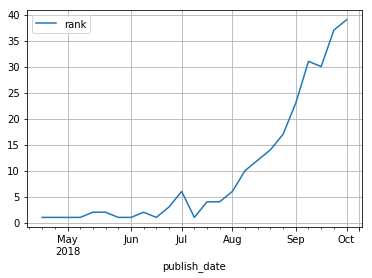

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
# Matrice de covariance

%matplotlib inline

df_artist_song = df_artist_song.set_index(pd.to_datetime(df_artist_song.publish_date), drop=True)
df_artist_song['rank'].plot(grid=True, label="rank", legend=True)
